<a href="https://colab.research.google.com/github/seo-jeong-bang/like_code/blob/main/%EB%8B%B9%EB%87%A8%EB%B3%91_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline


pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

plt.style.use("seaborn")

In [ ]:
#데이터 살펴보기
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.corr()["Outcome"].sort_values()

#글루코스와 당뇨가 가장 연관도가 높다는 것을 알 수 있다.

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

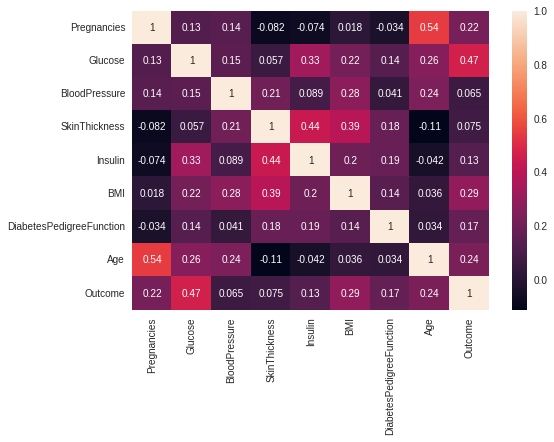

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

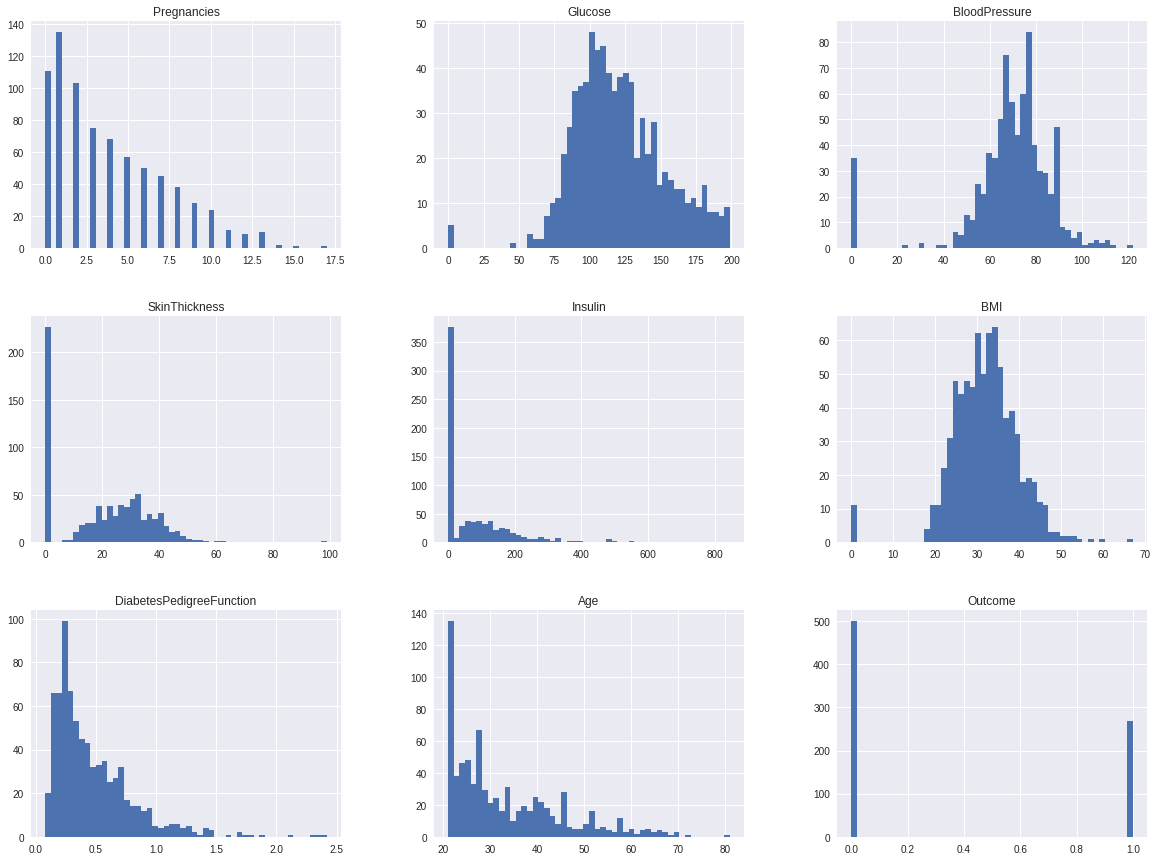

In [ ]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
#막대그래프를 살펴보니 0에서 시작하는 데이터들이 많아서 이 데이터를 개수를 알아보았다.
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    print(f" {col} 의 0 개수는: {df[col].value_counts()[0]}")

 Glucose 의 0 개수는: 5
 BloodPressure 의 0 개수는: 35
 SkinThickness 의 0 개수는: 227
 Insulin 의 0 개수는: 374
 BMI 의 0 개수는: 11


In [ ]:
#데이터 값이 0인 데이터를 중앙값으로 대체하였다.
for col in cols:
    col_median =df[col].median()
    #df.loc[df[col] == 0, col] = col_median

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


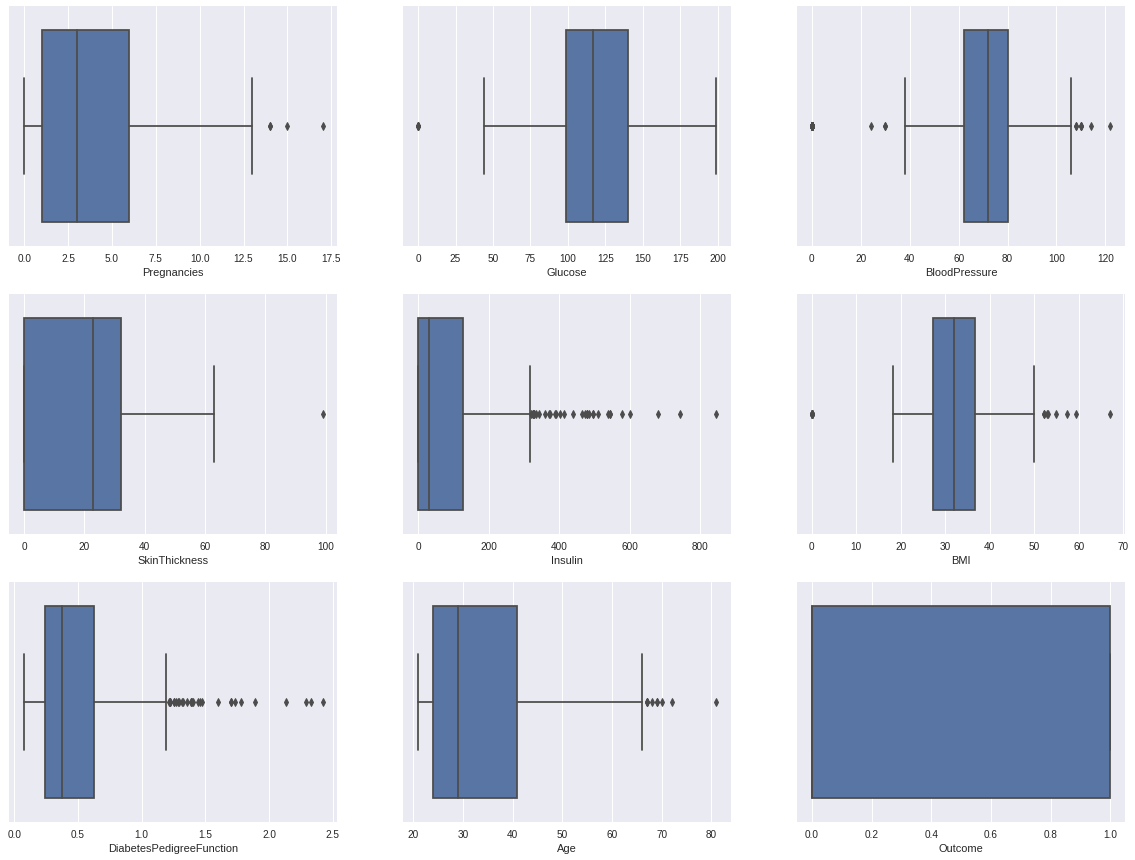

In [ ]:
#fig, ax = plt.subplots (3,3, figsize=(20,15))
#for i, column in enumerate (df.columns):
    #sns.boxplot(data = df, x = column, ax=ax[(i//3),i-(i//3)*3])


In [ ]:
#테스트 세트 만들기

x= df.drop(columns=['Outcome'],axis=1)
y=df['Outcome']

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
standarized_data = scaler.transform(x)

In [ ]:
print(standarized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [ ]:
x=standarized_data
y=df['Outcome']

In [ ]:
print(x)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
'''from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)'''

LinearRegression()

In [ ]:
'''from sklearn.metrics import mean_squared_error
x_predictions = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train,x_predictions)
lin_rmse =  np.sqrt(lin_mse)
lin_rmse'''


0.39090210089916433

In [ ]:
##랜덤 포레스트
#knn
##로지스틱
#결정트리
#svm
##sgd classifier

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve


from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, confusion_matrix,\
roc_curve
from sklearn.model_selection import cross_val_predict



log_reg_clf=LogisticRegression(random_state=42 , max_iter=500)
log_reg_pred = cross_val_predict(log_reg_clf, x_train, y_train, cv = 5)


In [ ]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 5, label= label)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlabel("False Positive Rate", fontname = "monospace", fontsize = 15 )
    plt.ylabel("True Positive Rate(Recall)", fontname = "monospace", fontsize = 15 )
    plt.title("ROC Curve", fontname = "monospace", fontsize = 17)
    plt.axis([0, 1, 0, 1])
    plt.show()

In [ ]:
models, auc_scores = [], []

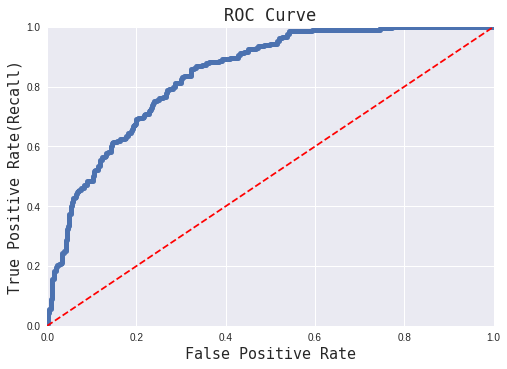

In [ ]:
log_reg_scores = cross_val_predict(log_reg_clf, x_train, y_train, cv = 3, method = "decision_function")
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_train, log_reg_scores)
plot_roc_curve(log_reg_fpr, log_reg_tpr)


In [ ]:
log_reg_auc = roc_auc_score(y_train, log_reg_scores)
log_reg_auc

0.8414878297214711

In [ ]:
log_reg_param_grid = [
    {
        "C": [0.25, 0.5, 1, 2,3]
    }
]

In [ ]:
log_reg_grid_search = GridSearchCV(log_reg_clf, log_reg_param_grid,
                                   cv = 3, scoring = "roc_auc",
                                   return_train_score = True)
log_reg_grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, random_state=42),
             param_grid=[{'C': [0.25, 0.5, 1, 2, 3]}], return_train_score=True,
             scoring='roc_auc')

In [ ]:
log_reg_grid_search.best_estimator_

LogisticRegression(C=0.25, max_iter=500, random_state=42)

In [ ]:
log_reg_grid_search.best_score_

0.8421450409711477

In [ ]:
#svc
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train,y_train)


SVC()

In [ ]:
svm_clf = SVC(random_state = 42)
svm_clf.fit(x_train,y_train)


In [ ]:
cross_val_score(svm_clf, x_train, y_train, cv = 5, scoring='accuracy')

array([0.75609756, 0.78861789, 0.74796748, 0.73170732, 0.7704918 ])

In [ ]:
#cross_val_predict(svm_clf, x_train, y_train, cv = 5)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

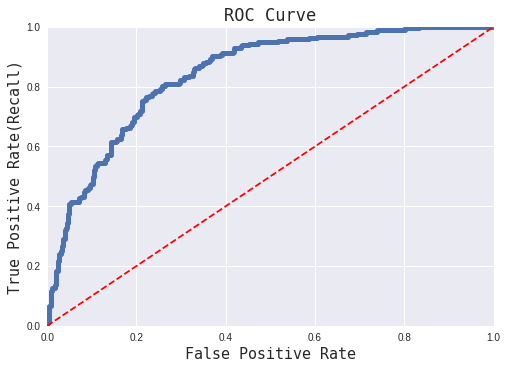

In [ ]:
svm_clf_scores = cross_val_predict(svm_clf, x_train, y_train, cv = 5, method = "decision_function")
svm_fpr, svm_tpr, _ = roc_curve(y_train, svm_clf_scores)
plot_roc_curve(svm_fpr, svm_tpr)

In [ ]:
svm_param_grid = {
    "kernel": ["rbf", "linear"],
    "C":[1, 5, 10, 20]
}

In [ ]:
svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv = 5,
                               scoring = "roc_auc",
                               return_train_score = True)
svm_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 5, 10, 20], 'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='roc_auc')

In [ ]:
svm_grid_search.best_estimator_

SVC(C=1, random_state=42)

In [ ]:
svm_grid_search.best_score_

0.8425678123675538

# 새 섹션